# Table Structure Modification + Image Generation Pipeline

In [120]:
print(example.keys())

dict_keys(['id', 'arxiv_id', 'page', 'bounding_box', 'latex_content', 'extracted_content', 'similarity_score', 'table_image', 'page_image'])


In [122]:
import sys, os
sys.path.append(os.path.abspath("."))

from modify_latex import drop_table_row

latex_str = r"""
\begin{tabular}{ccc}
A & B & C \\
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{tabular}
"""

# 删除第 1 行数据（从 0 开始，不含表头）
new_latex = drop_table_row(latex_str, row_index=1)

print("修改后的 LaTeX 表格：\n")
print(new_latex)

修改后的 LaTeX 表格：


\begin{tabular}{ccc}
A & B & C \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{tabular}



In [123]:
print(modified_latex)

\begin{table}[H]
    \centering
    \scriptsize
    \begin{tabular}{|p{3cm}|p{3cm}|p{4cm}|p{3cm}|}
      \hline
      \hline
      \multicolumn{4}{c}{Details of Experiments for the Employed Data Set}\\
      \cline{1-4}
\emph{Domain} & NEW & \emph{Raw Features} & \emph{Response} & \emph{Data Set Cardinality}\\
      \hline
Australian Credit Scoring & NEW & 99 & Desired credit approval of individuals based on characteristics & 690\\\hline
    \end{tabular}
    \caption{\small Data set descriptions for the experiments used to validate the efficacy of the proposed algorithm. We summarize here the domain of the application, the input features to the algorithm, the response variable we wish to predict and the number of examples provided in the data.}
  \end{table}


图像保存成功：outputs/table_20250520_132145_original.png
➡️ After insert_column:
 \begin{table}[H]
    \centering
    \scriptsize
    \begin{tabular}{|p{3cm}|p{2cm}|p{2cm}|p{2cm}|p{2cm}|}
      \hline
      \hline
      \multicolumn{5}{c}{Details of Experiments for the Variable Threshold Algorithm}\\
      \cline{1-5}
      \emph{Statistic} & \emph{Average} & \emph{Minimum} & \emph{Maximum} & \emph{Standard Deviation}\\
      \hline
      Predictive Accuracy of Random Forest & {\vspace{0mm}$85\%$} & {\vspace{0mm}$81\%$} & {\vspace{0mm}$90\%$} & {\vspace{0mm}$3.24\%$}\\\hline
      Convergence Time of Optimization Algorithm & {\vspace{0mm}$99$} & {\vspace{0mm}$7$} & {\vspace{0mm}$12$} & {\vspace{0mm}$2.2$}\\\hline
    \end{tabular}
    \caption{\small We present here some relevant statistics related to our experiments in parameter optimization. Notice that in the predictive accuracy criterion, larger values are preferable. By contrast, we have that convergence time is better for smaller values

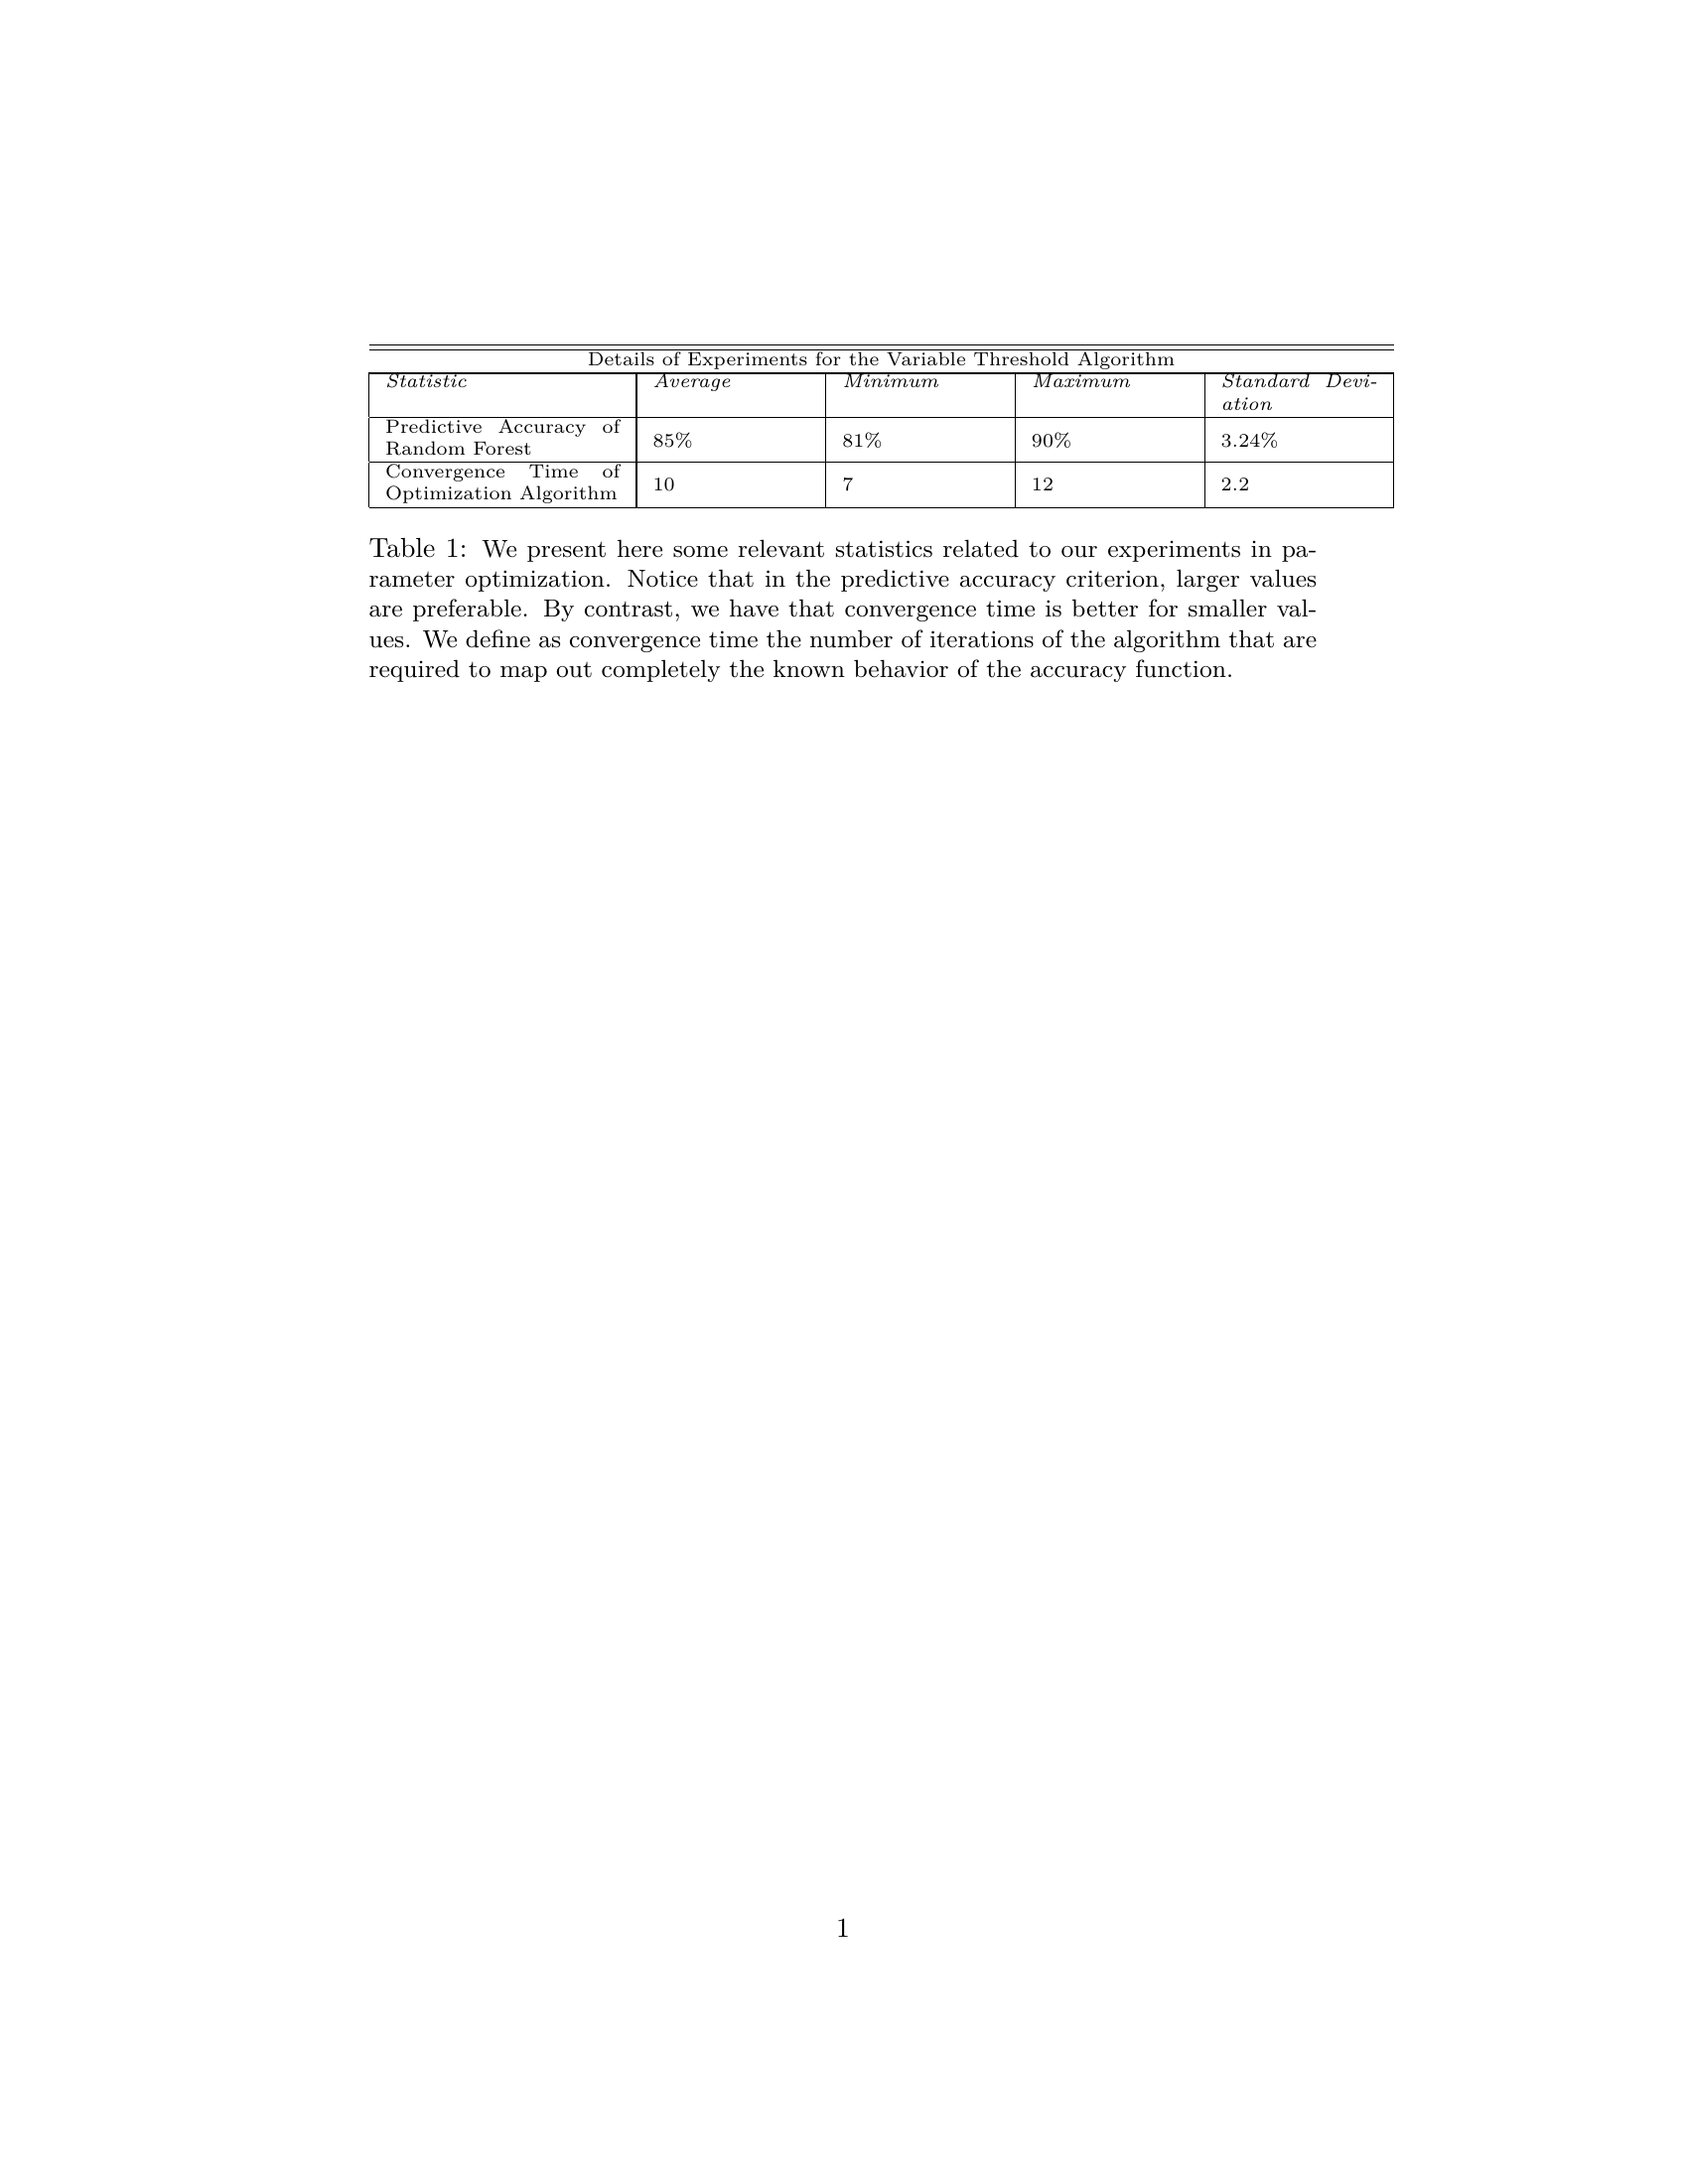

修改后表格：


FileNotFoundError: No such file or directory: 'outputs/table_20250520_132145_modified.png'

FileNotFoundError: No such file or directory: 'outputs/table_20250520_132145_modified.png'

<IPython.core.display.Image object>

In [8]:
# 示例：加载真实 ArXiv 表格数据并进行增删改操作

from datasets import load_dataset
from IPython.display import Image, display
import sys, os
import datetime
sys.path.append(os.path.abspath("."))
from modify_latex import (
    finalize_latex_structure,
    modify_numeric_values,
    drop_table_column,
    drop_table_row,
    insert_row_auto,
    insert_empty_row_auto,
    insert_column
)
from latex_to_image import save_latex_as_image

# 加载数据集
dataset = load_dataset("staghado/ArXiv-tables")
example = dataset["train"][1]  # 可改为其他条目
original_latex = example["latex_content"]

# 添加时间戳自动命名
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
name_base = f"outputs/table_{timestamp}"

# 处理前先生成原始表格图片
save_latex_as_image(original_latex, outname=f"{name_base}_original")

# 修改部分
modified_latex = modify_numeric_values(original_latex, old_val="10", new_val="99")  # 修改数值
print("➡️ After insert_column:\n", modified_latex)
# 插入列：先插一列
modified_latex = insert_column(modified_latex, col_index=1, default_value="NEW")
print("➡️ After insert_column:\n", modified_latex)
# 插入行：再插一行
modified_latex = insert_row_auto(modified_latex, fill="EMPTY")
print("➡️ After insert_column:\n", modified_latex)
# 删除列：之后再删原来的第3列
modified_latex = drop_table_column(modified_latex, col_index=2)
print("➡️ After insert_column:\n", modified_latex)
# 最后：统一更新 tabular 格式
modified_latex = finalize_latex_structure(modified_latex)
print("修改后预览：\n",modified_latex)

# 保存修改后图片
try:
    save_latex_as_image(modified_latex, outname=f"{name_base}_modified")
except Exception as e:
    print(" LaTeX 编译失败：", e)

# 展示对比
print("原始表格：")
display(Image(f"{name_base}_original.png"))
print("修改后表格：")
display(Image(f"{name_base}_modified.png"))


In [82]:
from datasets import load_dataset
from table_editor.latex_to_image import save_latex_as_image
from table_editor.modify_latex import modify_numeric_values, drop_table_column

# 加载 ArXiv-tables 数据集
dataset = load_dataset("staghado/ArXiv-tables")

# 查看一条示例数据（train 集第一条）
example = dataset["train"][0]

# 取出表格 LaTeX 字符串
original_latex = example["latex_content"]

# 看看长什么样
print(original_latex)

\begin{table}[H]
    \centering
    \scriptsize
    \begin{tabular}{|p{3cm}|p{3cm}|p{4cm}|p{3cm}|}
      \hline
      \hline
      \multicolumn{4}{c}{Details of Experiments for the Employed Data Set}\\
      \cline{1-4}
      \emph{Domain} & \emph{Raw Features} & \emph{Response} & \emph{Data Set Cardinality}\\
      \hline
      Australian Credit Scoring & 16 & Desired credit approval of individuals based on characteristics & 690\\\hline
    \end{tabular}
    \caption{\small Data set descriptions for the experiments used to validate the efficacy of the proposed algorithm. We summarize here the domain of the application, the input features to the algorithm, the response variable we wish to predict and the number of examples provided in the data.}
  \end{table}


In [ ]:
import re

# 提取 \begin{tabular} 到 \end{tabular} 的部分
match = re.search(r"\\begin{tabular}.*?\\end{tabular}", original_latex, re.DOTALL)
if match:
    tabular_code = match.group(0)
    print(tabular_code)
else:
    print("没找到 tabular 内容")

\begin{tabular}{|p{3cm}|p{3cm}|p{4cm}|p{3cm}|}
      \hline
      \hline
      \multicolumn{4}{c}{Details of Experiments for the Employed Data Set}\\
      \cline{1-4}
      \emph{Domain} & \emph{Raw Features} & \emph{Response} & \emph{Data Set Cardinality}\\
      \hline
      Australian Credit Scoring & 16 & Desired credit approval of individuals based on characteristics & 690\\\hline
    \end{tabular}


In [84]:
print(modified_wrapped)

\resizebox{\textwidth}{!}{
\begin{table}[H]
    \centering
    \scriptsize
    \begin{tabular}{|p{3cm}|p{3cm}|p{4cm}|p{3cm}|}
      \hline
      \hline
      \multicolumn{4}{c}{Details of Experiments for the Employed Data Set}\\
      \cline{1-4}
      \emph{Domain} & \emph{Raw Features} & \emph{Data Set Cardinality}\\
      \hline
      Australian Credit Scoring & 99 & 690\\\hline
    \end{tabular}
    \caption{\small Data set descriptions for the experiments used to validate the efficacy of the proposed algorithm. We summarize here the domain of the application, the input features to the algorithm, the response variable we wish to predict and the number of examples provided in the data.}
  \end{table}
}


图像保存成功：outputs/original_real_table.png
图像保存成功：outputs/modified_real_table.png


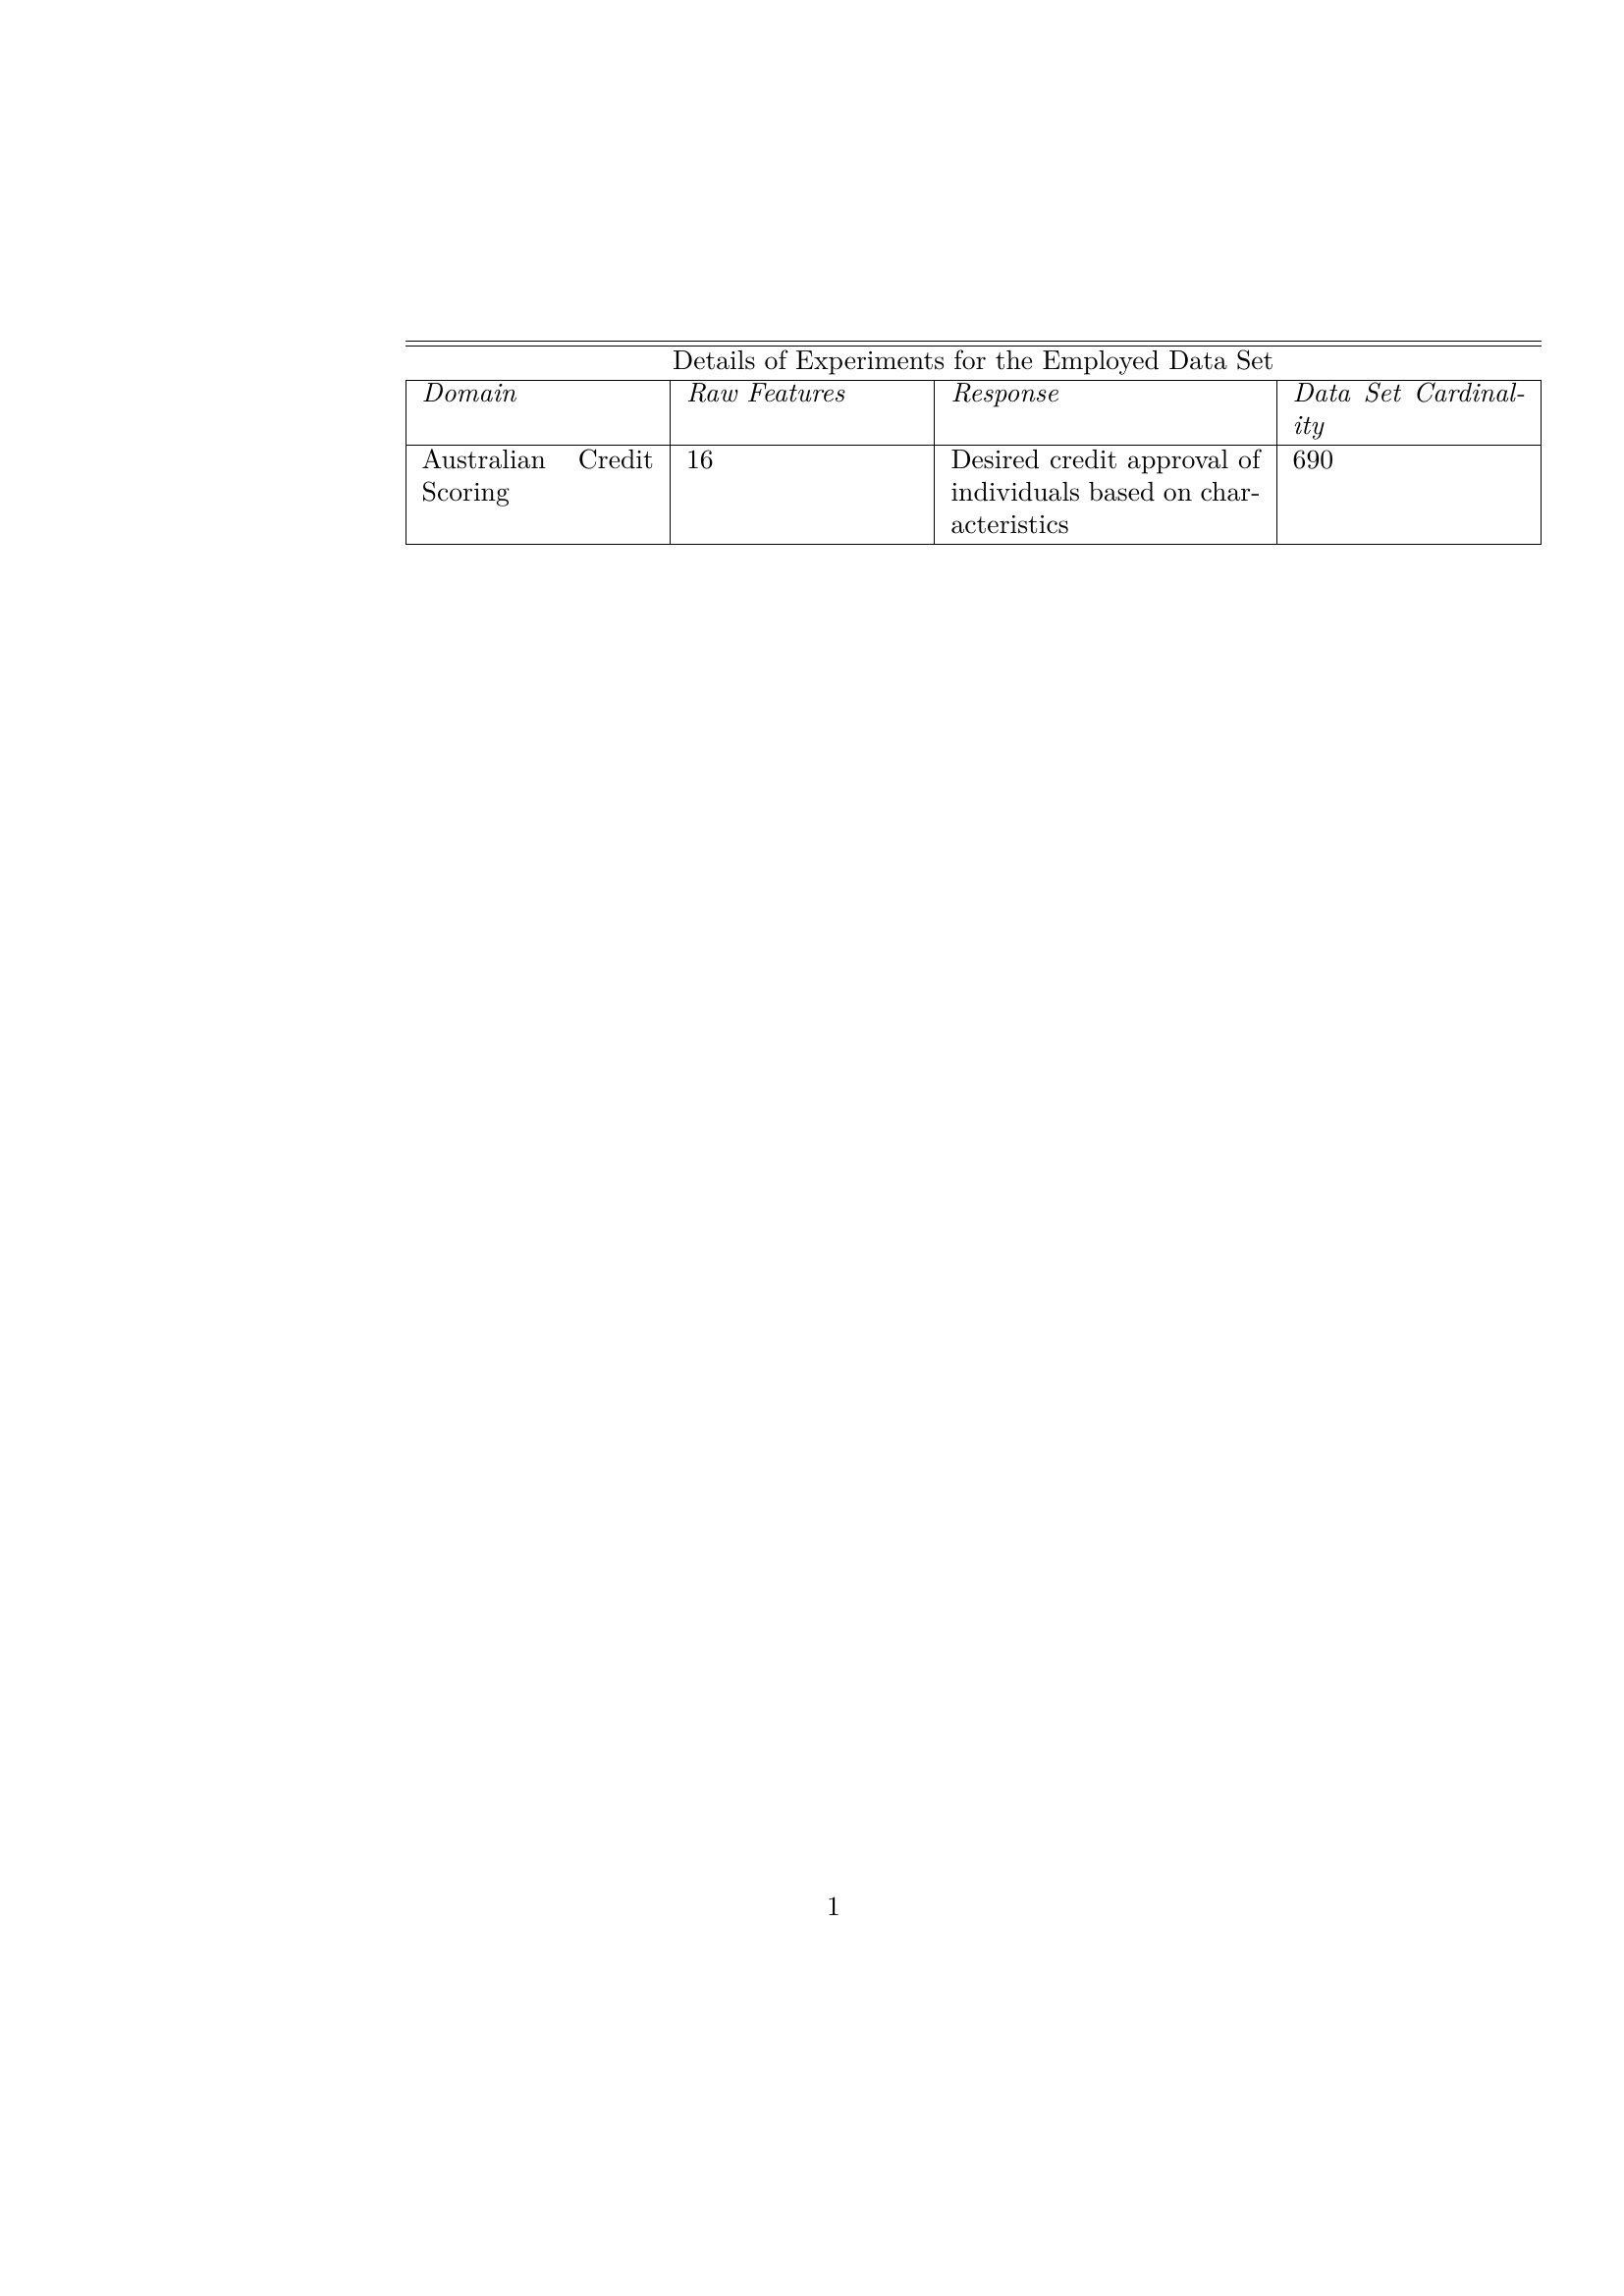

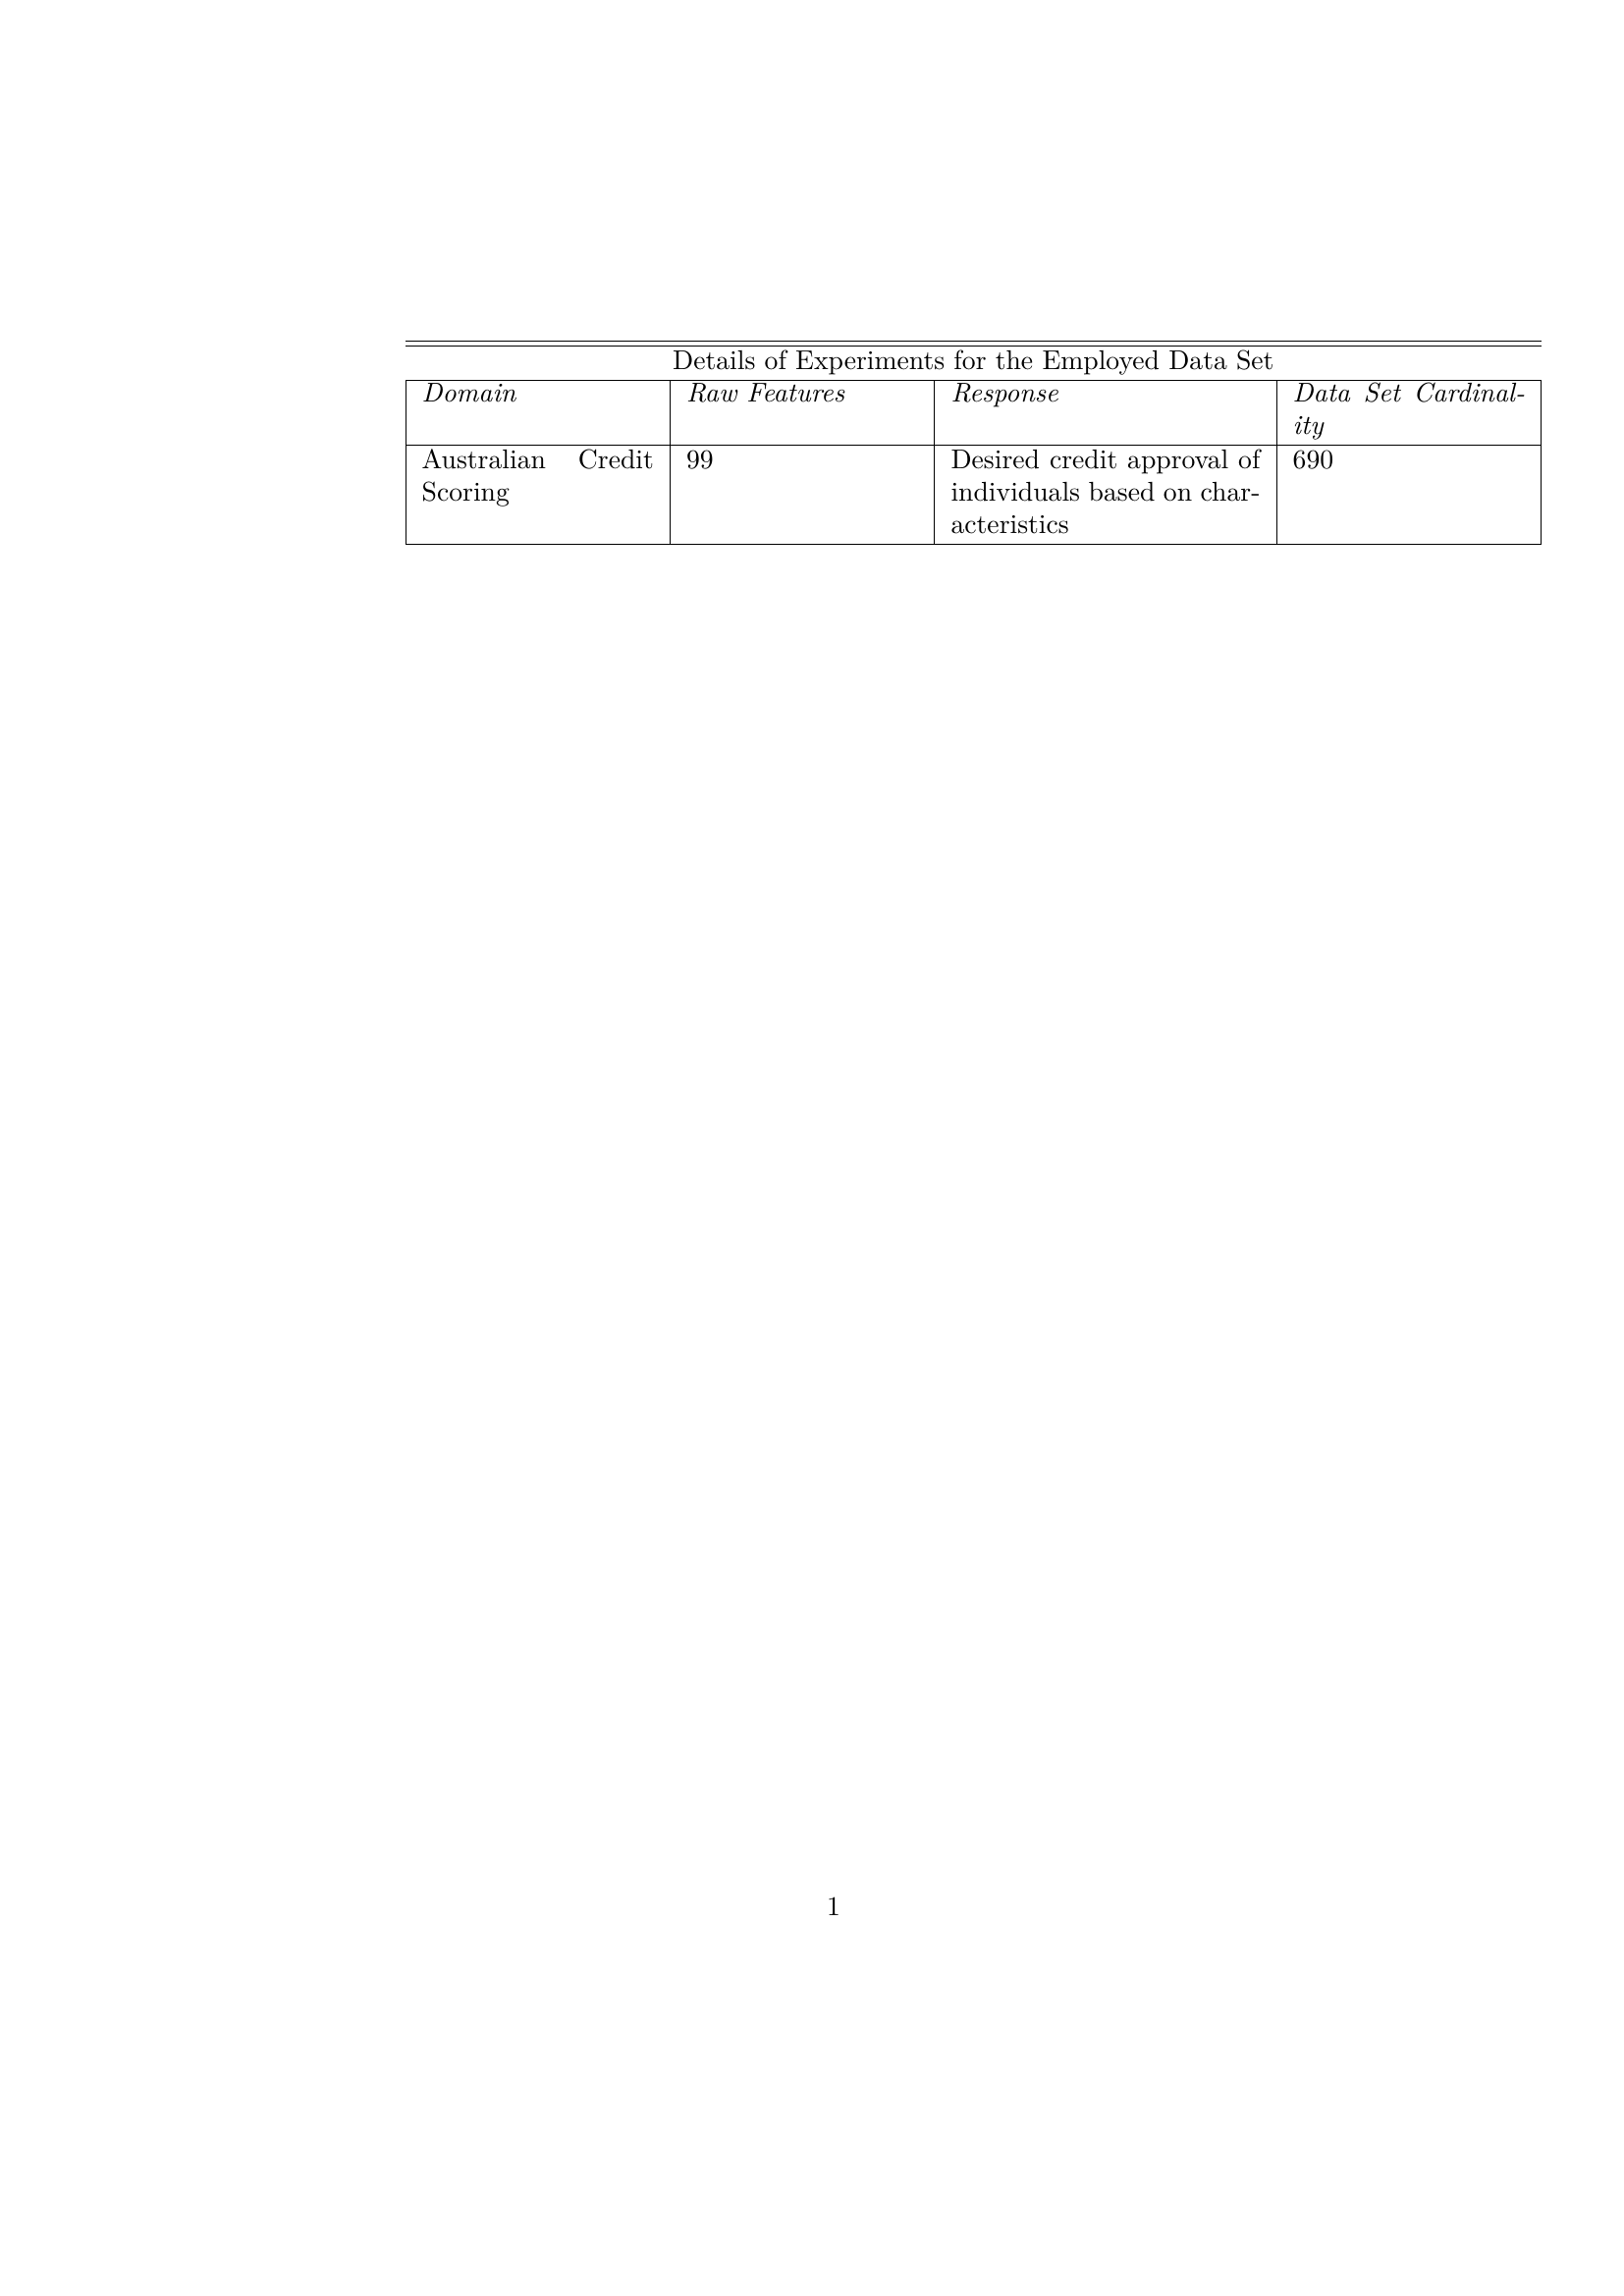

In [88]:
# 修改和生成图像
modified = modify_numeric_values(tabular_code, "16", "99")
#modified = drop_table_column(modified, col_index=2) 这里还有问题 没办法边框对齐

save_latex_as_image(tabular_code, outname="outputs/original_real_table")
save_latex_as_image(modified, outname="outputs/modified_real_table")

display(Image("outputs/original_real_table.png"))
display(Image("outputs/modified_real_table.png"))

In [90]:
# STEP 1: 导入模块
import sys
import os
sys.path.append(os.path.abspath(".."))

from table_editor.modify_latex import modify_numeric_values, drop_table_column
from table_editor.latex_to_image import save_latex_as_image
from IPython.display import Image, display
import os

In [35]:
# STEP 2: 定义原始 LaTeX 表格
original_latex = r"""
\begin{tabular}{cc}
\toprule
A & B \\
\midrule
0.95 & 1.0 \\
4.5 & 5.6 \\
\bottomrule
\end{tabular}
"""

In [37]:
# STEP 3: 结构修改（比如替换数值、删列）
modified_latex = modify_numeric_values(original_latex, old_val="0.95", new_val="0.55")
modified_latex = drop_table_column(modified_latex, col_index=2)

In [38]:
print(modified_latex)


\begin{tabular}{cc}
\toprule
A & B \\
\midrule
0.55 & 1.0 \\
4.5 & 5.6 \\
\bottomrule
\end{tabular}



In [39]:
# STEP 4: 生成图像
save_latex_as_image(original_latex, outname="outputs/original_table")
save_latex_as_image(modified_latex, outname="outputs/modified_table")


图像保存成功：outputs/original_table.png
图像保存成功：outputs/modified_table.png


原始表格：


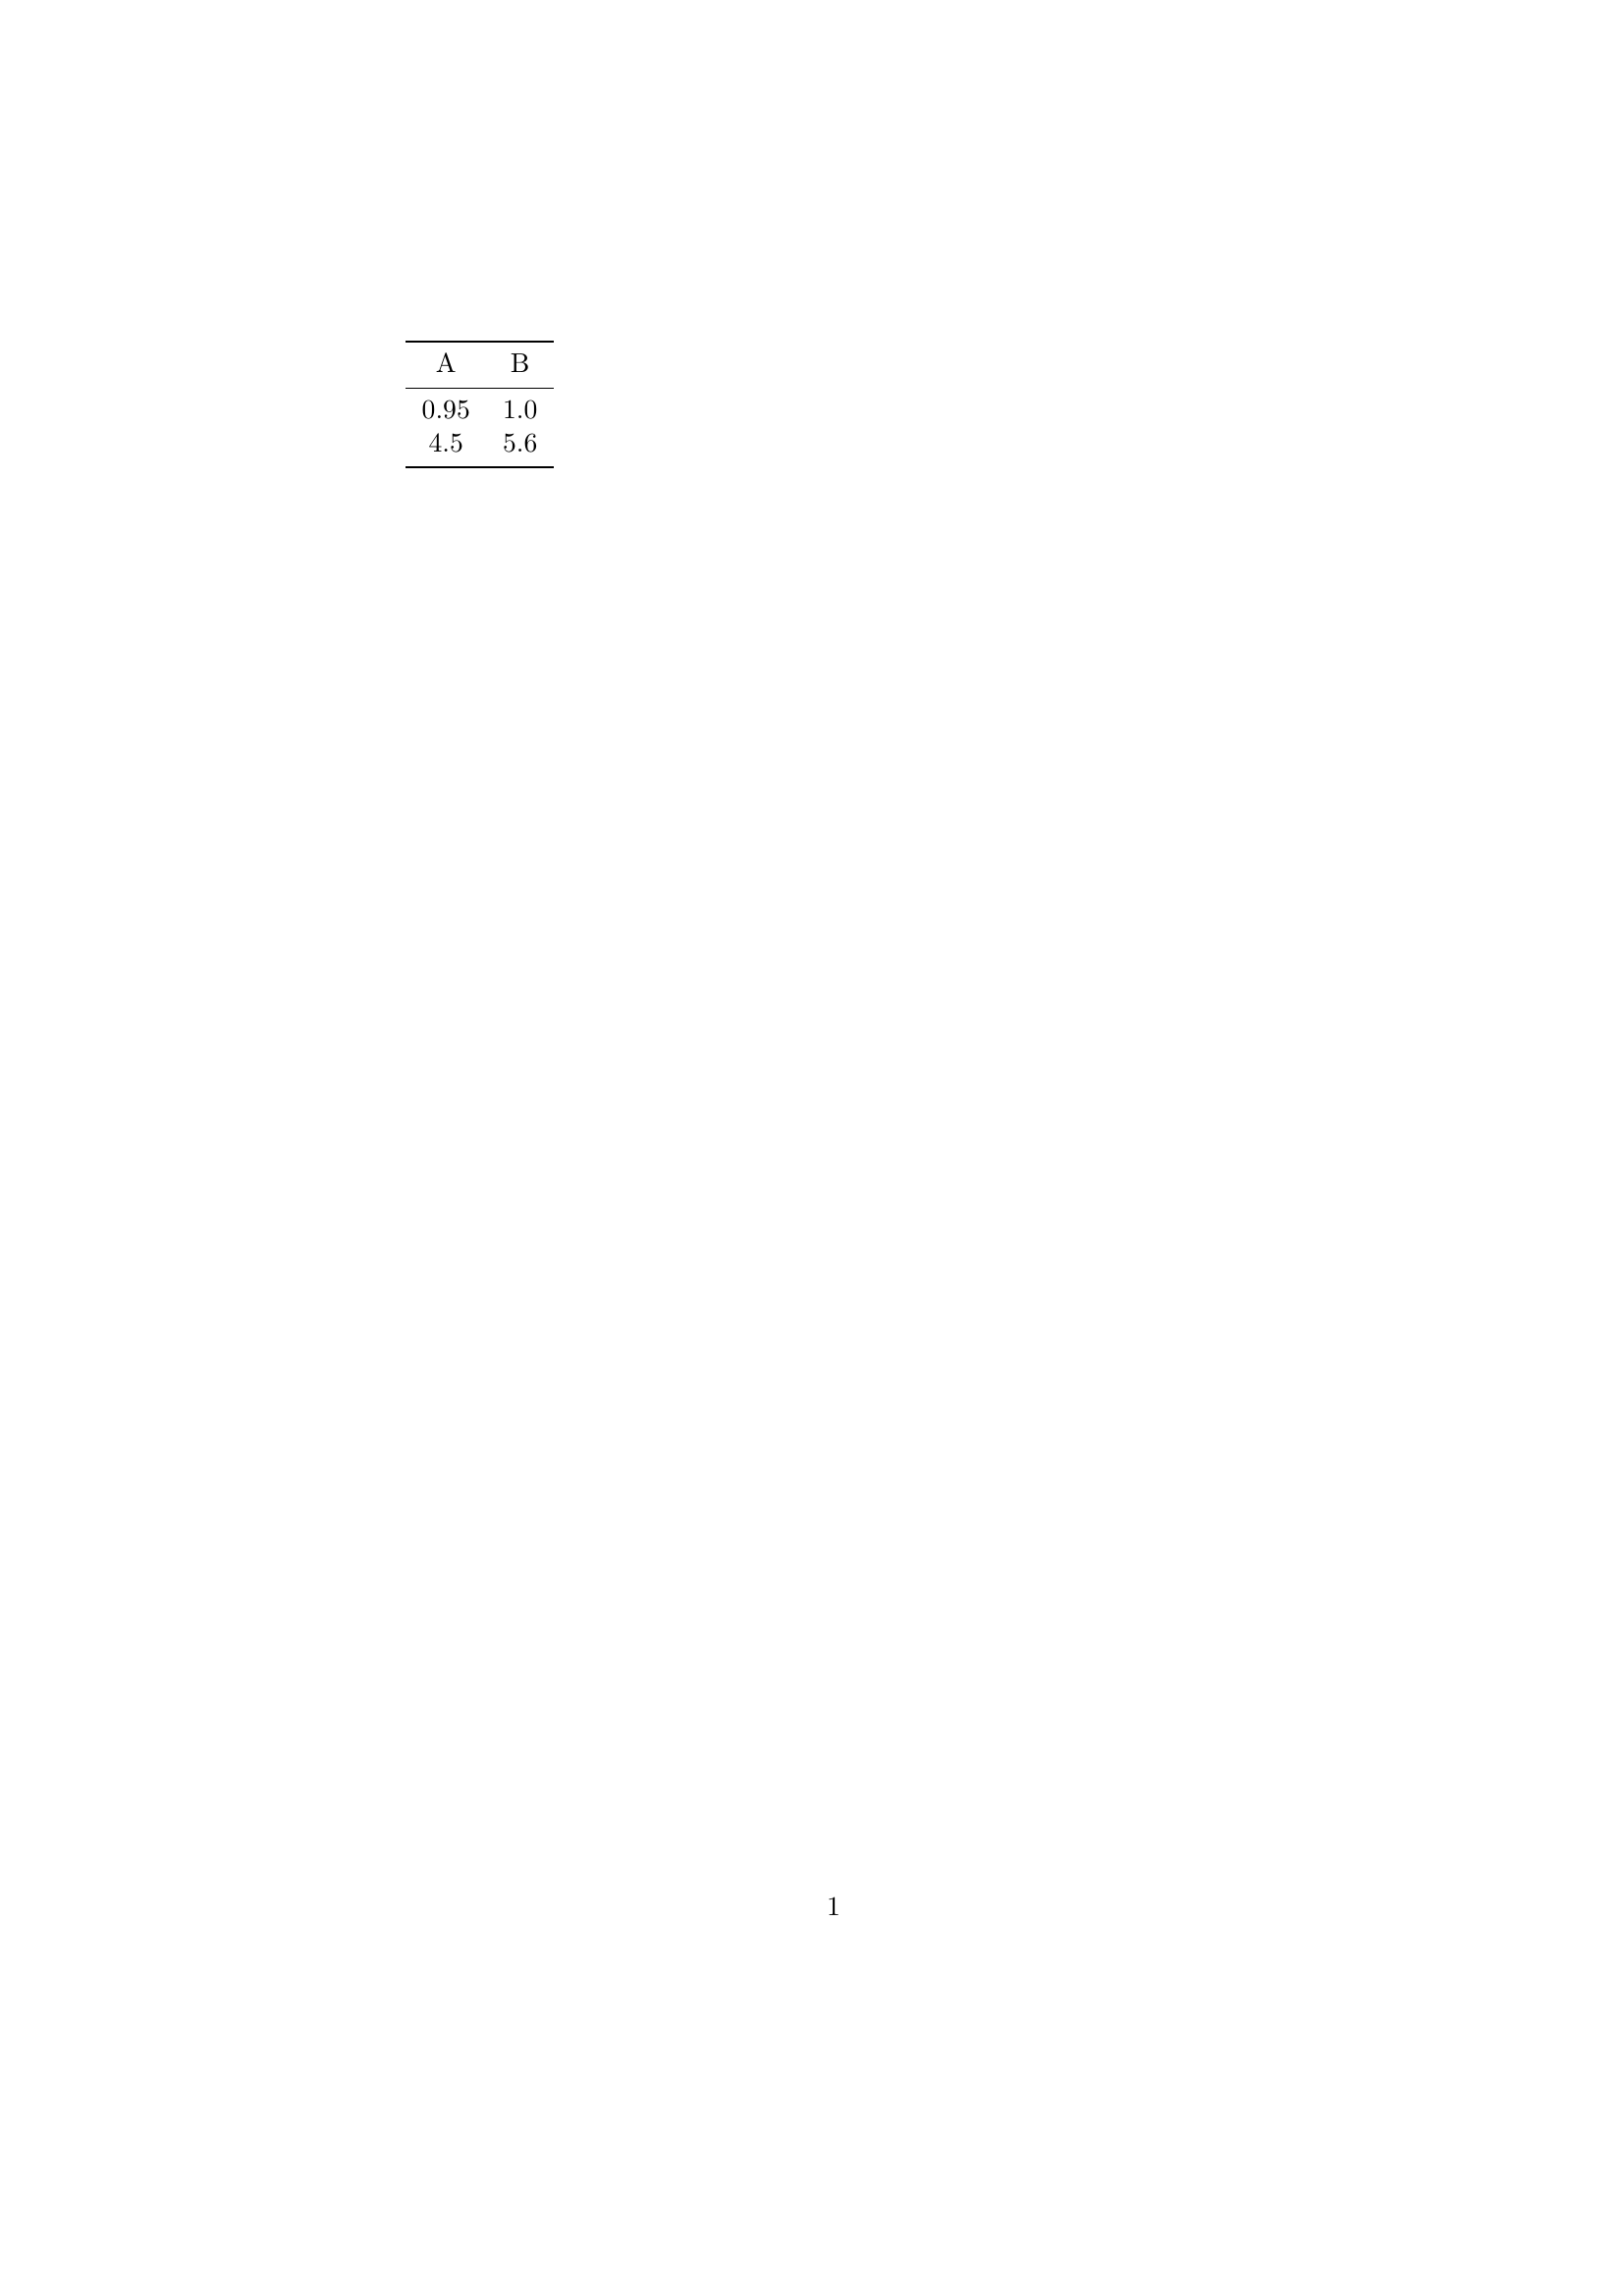

修改后的表格：


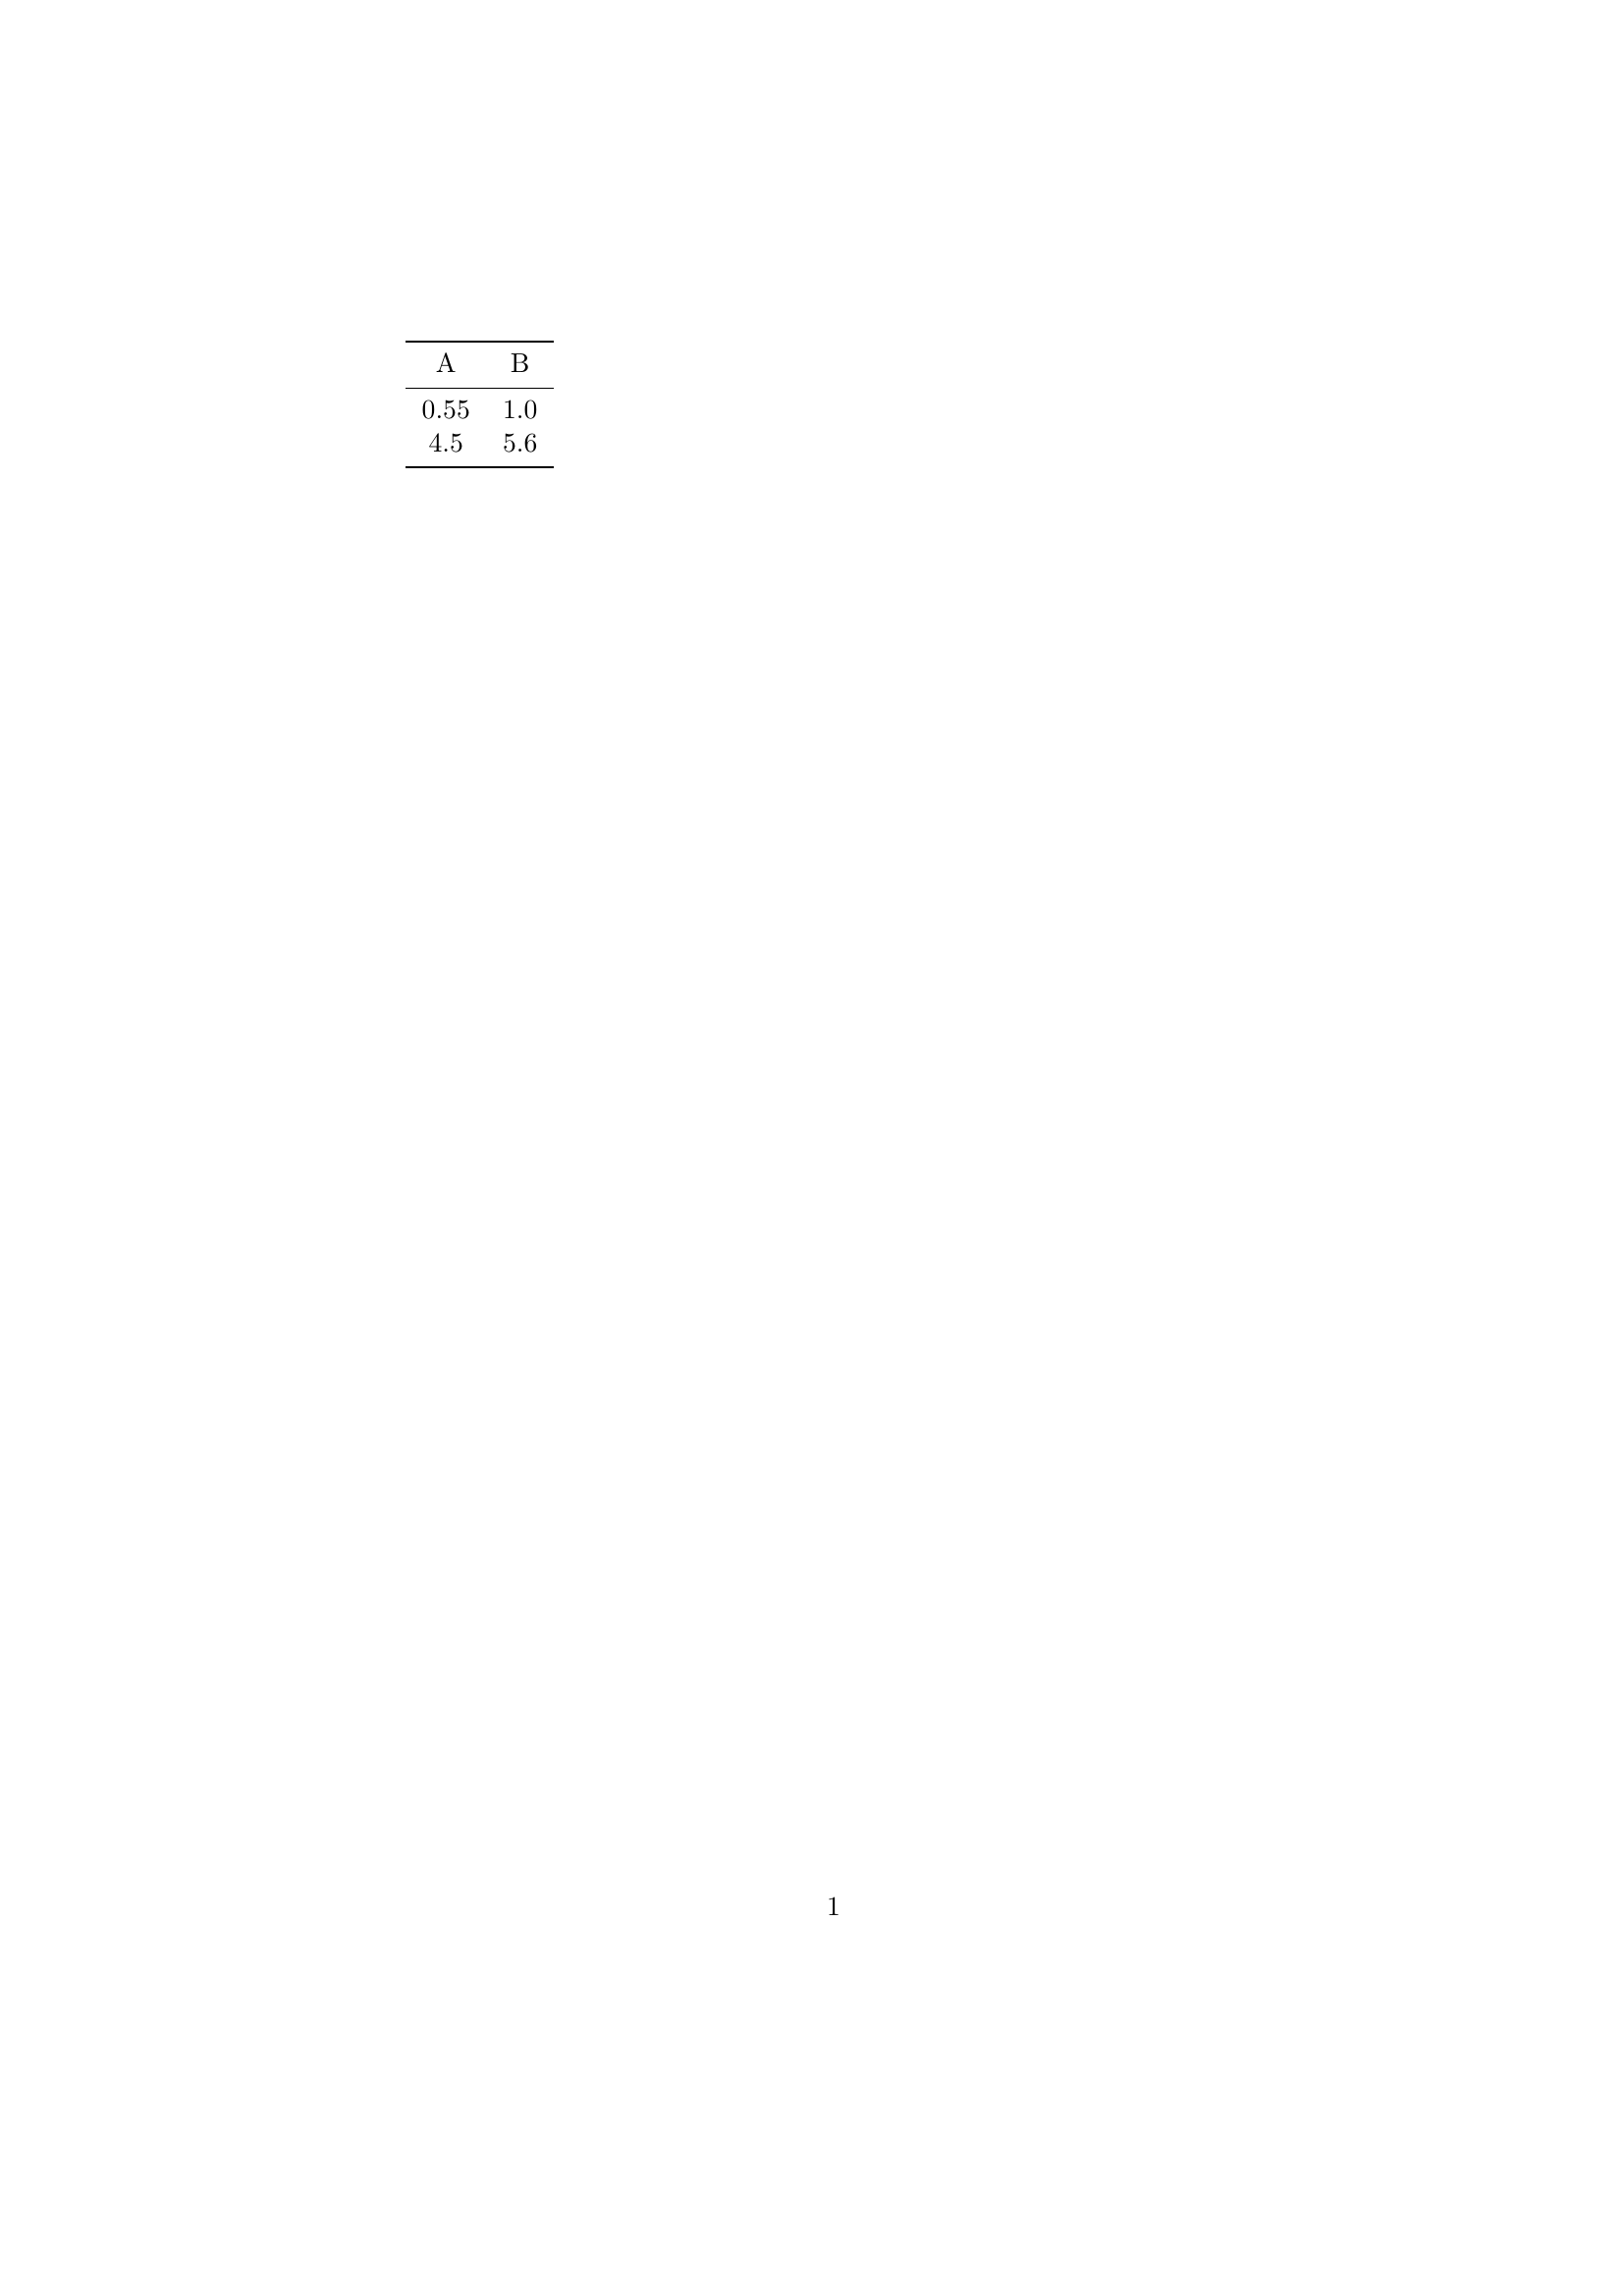

In [40]:
# STEP 5: 可视化展示
print("原始表格：")
display(Image("outputs/original_table.png"))

print("修改后的表格：")
display(Image("outputs/modified_table.png"))

In [ ]:
from table_editor.latex_to_image import save_latex_as_image
import os

# 创建输出文件夹（如果不存在）
os.makedirs("outputs", exist_ok=True)

# 一个简单的 LaTeX 表格
test_latex = r"""
\begin{tabular}{cc}
A & B \\
1 & 2 \\
\end{tabular}
"""

# 生成图像
save_latex_as_image(test_latex, outname="outputs/debug_table")

# 检查是否生成成功
print("是否生成 debug_table.pdf?", os.path.exists("outputs/debug_table.pdf"))
print("是否生成 debug_table.png?", os.path.exists("outputs/debug_table.png"))

图像保存成功：outputs/debug_table.png
🧪 是否生成 debug_table.pdf? True
🧪 是否生成 debug_table.png? True


In [21]:
print(modified_latex)


\begin{tabular}{ccc}
\toprule
A & B 
\midrule
0.55 & 1.0 
4.5 & 5.6 
\bottomrule
\end{tabular}

